In [1]:
# Author: Steve Sommer
# Date: 9/26/2023
# Assignment: Homework1
# Due: Sep 29, 2023 11:59 PM

In [99]:
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [100]:
'''
scatterPlt is the same function we used in lab 2. You can call
    it to plot the points and centroids--as long as dimensions = 2.
'''
def scatterPlt(allCoords,centroids):
    xCoors = [allCoords[i][0] for i in range(len(allCoords))]
    yCoors = [allCoords[i][1] for i in range(len(allCoords))]
    xCen   = [centroids[i][0] for i in range(len(centroids))]
    yCen   = [centroids[i][1] for i in range(len(centroids))]
    
    print(xCoors)
    print(yCoors)
    
    plt.scatter(xCoors, yCoors, c="g", alpha=0.5)
    plt.scatter(xCen, yCen, s=4*(rcParams['lines.markersize'] ** 2), c="r", alpha=1.0)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.show()

In [101]:
'''
TODO: Write a function that will open the file passed in 
        and read the data points from the file. You can
        assume all data points will have the same number of
        dimensions.
      You should store each point as an array of floats, with 
        each point being an additional element in the list.
        See lab2 for an example of how to do this.
        
INPUT:  String that references csv file with all your datapoints,
            each stored as a comma-separated value on a new line.
            
OUTPUT: Return the list of data points read from file.
'''

def get_data_points_from_file(dataPointsFile):
    dataPoints = []
    fin = open(dataPointsFile,"r")
    file_content = fin.read()
    lines = file_content.split("\n")
    
    #HINT: Read line by line using for-loop
    for line in lines:
        if line == '':
            continue
        values = line.split(',')
        data_point = []
        for value in values:
            if value == '':
                continue
            data_point.append(float(value))
        dataPoints.append(data_point)
                
       
    #HINT: Don't forget to close file
    fin.close()
    
    return dataPoints

In [102]:
'''
TODO: Write another function that will open the file passed in 
        and read the centroids from the file. Once more, you can
        assume all data points will have the same number of
        dimensions.
      You should store each point as an array of floats, with 
        each point being an additional element in the list.
        
INPUT:  String that references csv file with all your centroids,
            each stored as a comma-separated value on a new line.
            
RETURN: Python list of data points read from file.
'''

def get_centroids_from_file(centroidsFile):
    #HINT: Go thru line by line using for-loop
    
    centroids = []
    fin = open(centroidsFile,"r")
    file_content = fin.read()
    lines = file_content.split("\n")
    
    #HINT: Read line by line using for-loop
    for line in lines:
        if line == '':
            continue
        values = line.split(',')
        centroid = []
        for value in values:
            if value == '':
                continue
            centroid.append(float(value))
        centroids.append(centroid)
                
       
    #HINT: Don't forget to close file
    fin.close()
    
    
    return centroids

In [103]:
'''
TODO: Define a distance function that uses Euclidean (L2)
        distance to determine how far two  points of an
        arbitrary dimension are from one another. 
      You can assume the two points will have the same number
        of dimensions.
      The two points will each be passed in as arrays of floats,
        each float value representing a dimension.
      
INPUT:  Two points, each represented as an array of floats.

RETURN: Returns Euclidean (L2) distance between points. 
'''

def get_distance(point1,point2):
    # HINT: Use Euclidean distance here.
    
    if len(point1) != len(point2):
        raise ValueError ("Points must have the same number of dimensions")
    
    distance = 0
    for i in range (len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

In [104]:
'''
TODO: Define a function to find the cluster label (i.e., 
         the nearest centroid). In case of a tie, use the
         centroid that occurs earliest in the list.
         
INPUT: A single point, represented as an array of floats, one
            float value per dimension.
        
RETURN: The *INDEX* of the nearest centroid, as stored in
            your centroids array.
'''

def get_nearest_centroid(myPoint, myCentroids):
    leastDist = get_distance(myPoint,myCentroids[0])
    closestCent = 0
    
    #HINT: Use for-loop to find closest centroid
    #      You should call your get_distance() function to help do this.
    
    for i in range(1, len(myCentroids)):
        distance = get_distance(myPoint,myCentroids[i])
        if distance < leastDist:
            leastDist = distance
            closestCent = i
            
    return closestCent

In [118]:
'''
TODO: Define a function that re-centers the centroids after
        all points have been assigned.
        
INPUT: Your list of data points, your list of cluster labels,
        your list of current centroids.
        
RETURN: An array of your newly calculated centroids, where
        each centroid is stored as an array of floats.
'''

def recalibrate_centroids(myDataPoints, myLabels, myCentroids):
  
    newCentArr = []
    for i in range(len(myCentroids)):
        newCent = [0.0 for i in range(len(myCentroids[0]))]
        ptCount = 0 

        for j in range(len(myDataPoints)):
            if myLabels[j] == i:
                for k in range(len(newCent)):
                    newCent[k] += myDataPoints[j][k]
                ptCount += 1
            
        newCentArr.append(newCent)
    
    # Return the new centroid array
    return newCentArr

In [106]:
'''
TODO: Write a function that will re-assign all points to new centroids.
      Hint: You'll need to call your get_nearest_centroid() function.
      
INPUT: Your list of data points and your list of centroids.

RETURN: Your new list of cluster memberships. This will be a list of
        *INDICES* to your cluster array.
'''

def assign_data_points(myDataPoints, myCentroids):
    clustLabels = []
    
    # HINT: Use your get_nearest_centroid() function to find which centroid
    #          is closest.
    for data_point in myDataPoints:
        nearest_centroid_index = get_nearest_centroid(data_point, myCentroids)
        clustLabels.append(nearest_centroid_index)
        
    return clustLabels

In [107]:
'''
TODO: Define a function to find distortion.

INPUT: Your list of data points, your list of cluster labels, and your
        list of centroids.
        
RETURN: The total distortion across all points. The formula for this
        can be found in the slides we covered in lecture.
'''

def get_distortion(myDataPoints, myLabels, myCentroids):
    totalDist = 0.0
    
    for i in range(len(myDataPoints)):
        centroid_index = myLabels[i]
        data_point = myDataPoints[i]
        centroid = myCentroids[centroid_index]
        distance = get_distance(data_point, centroid) ** 2
        totalDist += distance
        
    return totalDist  

In [108]:
'''
TODO: Do KMeans while distortion ratio between two runs stays
        above 0.01 and number of iters doesn't exceed 25.
      Note that this is where you'll call your assign_data_points()
        and recalibrate_centroids() functions on each iteration.
      You'll also need to calculate the distortion for the current 
        iteration and also keep track of previous iteration's distortion.
      See comments below.
      
INPUT: Your list of data points and your list of centroids.

RETURN: Your list of cluster labels, your list of centroids, and the 
        number of iterations (i) KMeans ran.
        
'''

def do_KMeans(myDataPoints, myCentroids):
    prevDist = 0.001
    thisDist = 0.0
    
    # Keep track of number of iterations
    i = 0
    while(i < 25):  # Cap the number of iterations at 25
        
        # HINT: 1. Call assign_data_points() using the correct arguments
        #       Store the return value (all the cluster assignments).
        clustLabels = assign_data_points(myDataPoints, myCentroids)

        # HINT: 2. Call recalibrate_centroids() with the correct arguments.
        #       One of these arguments will be the result of step (1).
        myCentroids = recalibrate_centroids(myDataPoints, clustLabels, myCentroids)
        
        # HINT: 3. Calculate distortion for the current assignment of data points.
        #       You'll use your get_distortion() function with the correct arguments.
        #       Store the result in a variable called "thisDist", which is used below.
        thisDist = get_distortion(myDataPoints, clustLabels, myCentroids)
        
        # Increase iter counter
        # If proportional distortion is small enough (i.e., little change in clusters
        #    since last iterations), break loop. Else, keep going.
        i += 1
        if i == 1:
            prevDist = thisDist
            continue
         
        # Need abs here, since we don't want the sign value.
        elif abs( (thisDist-prevDist) / prevDist ) < 0.01:
            break
            
        else:
            prevDist = thisDist
      
    # Return cluster membership, new centroids, and the number of iters run
    # Note that, in Python, these can all be returned at the same time.
    return clustLabels, myCentroids, i

In [109]:
###################################################
# Code below will call your functions.
###################################################

In [110]:
#TODO: Open your data_points file and store the points in a list
data = get_data_points_from_file("data_points.csv")
print(data)

[[1.0, 5.78], [17.3, 9.7], [21.8, 22.0], [-6.2, 2.0], [-9.0, 17.0], [7.0, 8.99], [3.6, 11.3], [23.1, 18.3], [2.0, 25.8], [9.87, 2.24]]


In [111]:
#TODO: Open your centroids file and store the centroids in another list
centroids = get_centroids_from_file("centroids.csv")
print(centroids)

[[-3.3, -1.0], [0.0, 0.0], [9.0, 11.2]]


[1.0, 17.3, 21.8, -6.2, -9.0, 7.0, 3.6, 23.1, 2.0, 9.87]
[5.78, 9.7, 22.0, 2.0, 17.0, 8.99, 11.3, 18.3, 25.8, 2.24]


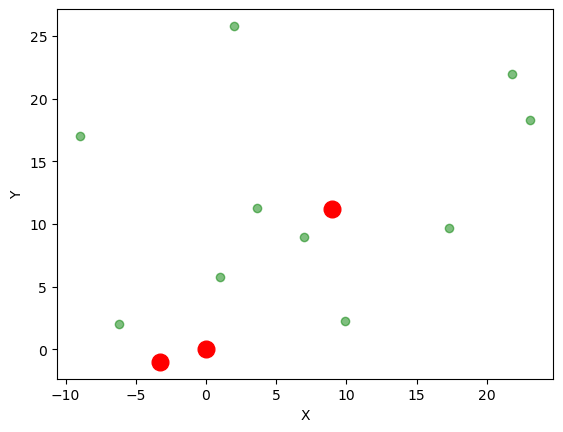

In [112]:
#TODO: Plot points before using KMeans
scatterPlt(data,centroids)

In [113]:
#TODO: Run your KMeans function on your datapoints and centroids.
#      Store labels, centroids, and iters that are returned.
myLabels = []
iters = 0
myLabels, centroids, iters = do_KMeans(data,centroids)

In [114]:
#Print iterations taken to converge
print(iters)

2


In [115]:
#Print centroids
print(centroids)

[[70.47, 123.10999999999999], [70.47, 123.10999999999999], [70.47, 123.10999999999999]]


In [116]:
#Print cluster memberships
print(myLabels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[1.0, 17.3, 21.8, -6.2, -9.0, 7.0, 3.6, 23.1, 2.0, 9.87]
[5.78, 9.7, 22.0, 2.0, 17.0, 8.99, 11.3, 18.3, 25.8, 2.24]


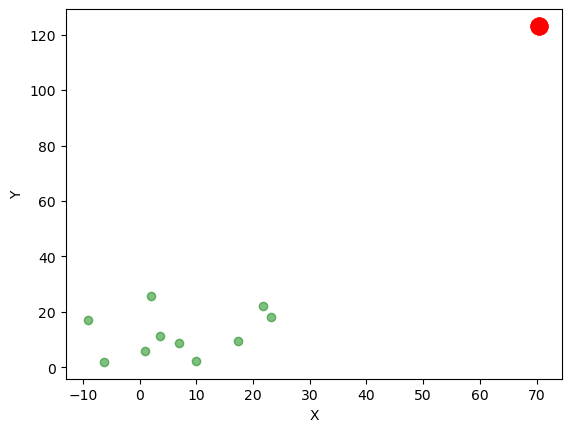

In [117]:
# TODO:  Plot points and centroids after using KMeans

scatterPlt(data,centroids)

In [ ]:
# TODO: Try running the sci-kit learn KMeans function like we did in lab.
#       See if you get the same plot as you did after running your own 
#          function in the cell above.


In [ ]:
# TODO: Read in all data points from the wine dataset. 
#       After your points are read in, store the label (i.e., the last column)
#          from each point in a separate list and remove it from the data point.


In [ ]:
# TODO: Create two random centroids.


In [ ]:
# TODO: Repeat the steps above on these new wine data points and centroids.


In [ ]:
# TODO: What are the cluster memberships for the wines? Is there any 
#          relationship between the memberships and the actual labels?
#       (Recall you stored the labels in a separate array before clustering.)
